In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from FileCrawler import crawl
from CreateDataset import *
import pandas as pd
import imutils
plt.rcParams["figure.figsize"] = (7,7)


In [3]:
all_triggers = crawl("/run/media/mateusz/Seagate Expansion Drive/20190330Subset/N1", analyze, debug=True)
np.save("out.npy", all_triggers, allow_pickle=True)

Analyzing file 0/497 (0.0%)
Analyzing file 1/497 (0.2012072434607646%)
Analyzing file 2/497 (0.4024144869215292%)
Analyzing file 3/497 (0.6036217303822937%)
Analyzing file 4/497 (0.8048289738430584%)
Analyzing file 5/497 (1.0060362173038229%)


In [4]:
rows = []
for trigger in all_triggers:
    start, end = trigger.bounding_box
#     trigger.show()
    rows.append(
        [trigger.filename, trigger.start_frame, trigger.end_frame, start.x, start.y, end.x, end.y,trigger.length ,trigger.magnitude])

df = pd.DataFrame(
        data=rows,
        columns=["file", "start_frame", "end_frame", "box_up_left_x", "box_up_left_y", "box_down_right_x",
                  "box_down_right_y","length" ,"count"])

df.to_csv("out.csv")
df

,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count
0,/run/media/mateusz/Seagate Expansion Drive/201...,28,32,1870,957,1881,986,29.732137,5
1,/run/media/mateusz/Seagate Expansion Drive/201...,256,310,1786,217,1794,246,26.925824,40
2,/run/media/mateusz/Seagate Expansion Drive/201...,299,557,1847,658,1855,690,32.557641,487
3,/run/media/mateusz/Seagate Expansion Drive/201...,312,557,1847,658,1855,690,32.557641,470
4,/run/media/mateusz/Seagate Expansion Drive/201...,368,557,1847,658,1855,690,32.557641,376
5,/run/media/mateusz/Seagate Expansion Drive/201...,439,557,1847,658,1855,690,32.557641,232
6,/run/media/mateusz/Seagate Expansion Drive/201...,468,557,1847,658,1855,690,32.557641,191
7,/run/media/mateusz/Seagate Expansion Drive/201...,492,557,1847,658,1854,690,32.557641,154
8,/run/media/mateusz/Seagate Expansion Drive/201...,29,48,127,235,133,299,63.285069,20


In [5]:
df.sort_values(["length"], ascending=False, inplace=True)

In [6]:
def combine_frames(frame_list):
    return np.amax(frame_list, axis=0)

def get_frames(path, start, stop):
    capture = cv2.VideoCapture(path)
    capture.set(cv2.CAP_PROP_POS_FRAMES, start)
    frames = []
    for i in range(stop - start + 1):
        status, frame = capture.read()
        frames.append(frame)
    return frames
        
    
def add_marker(frame, trigger):
    rect = trigger.bounding_box
    cv2.rectangle(frame, rect[0].tuple(), rect[1].tuple(), (0, 255, 0),2)
    return frame


def show_trigger(trigger):
    frames = get_frames(trigger.filename, trigger.start_frame, trigger.end_frame)
    result = combine_frames(frames)
    result = add_marker(result, trigger)
    plt.imshow(result)
    plt.show()

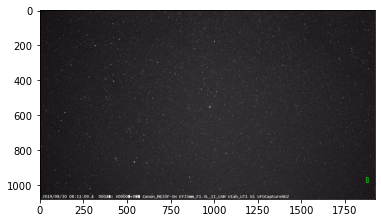

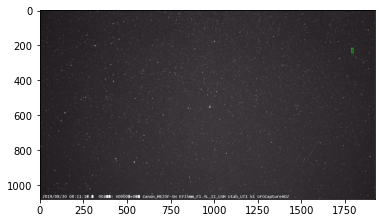

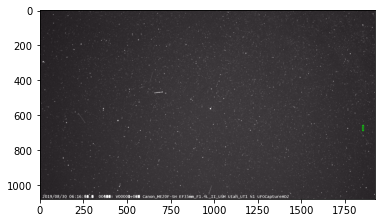

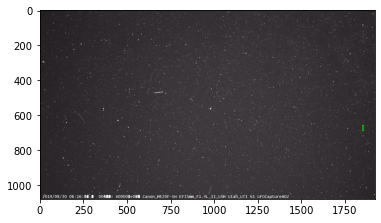

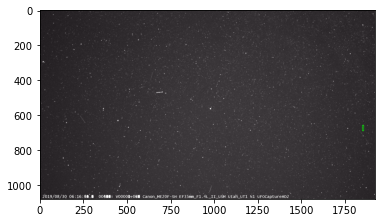

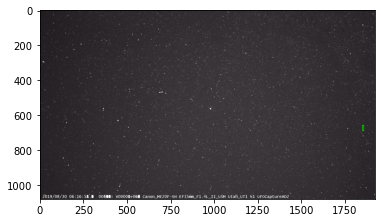

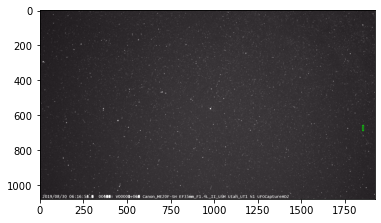

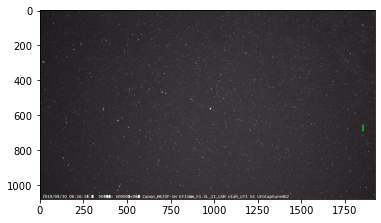

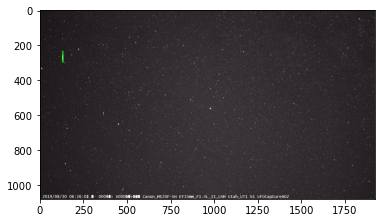

In [7]:
%matplotlib inline
for trigger in all_triggers:
    show_trigger(trigger)

In [9]:
%matplotlib
show_trigger(all_triggers[-1])

Using matplotlib backend: TkAgg
